In [1]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import scipy.stats as st

In [192]:
from sklearn.utils import shuffle
def batch_generator(X, y, shuffle_state =True, batch_size=1):
    
    n = X.shape[0]
    if shuffle_state:
        X, y = shuffle(X, y)
    for i in range(0, n, batch_size):
        try:
            yield (X[i:i + batch_size], y[i:i + batch_size])
        except IndexError:
            yield (X[i::], y[i::])

In [203]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier1(BaseEstimator, ClassifierMixin):
    def __init__(self,lambda_=0.1,min_err = 0.1, C = 1,batch_generator = batch_generator,alpha=0.01, max_epoch=1000,batch_size = 100):
        self.lambda_ = lambda_
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.batch_size = batch_size
        self.min_err = min_err
        
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    

    
    def fit(self, X, Y):
        eps = 1e-15
        n, m = X.shape   

        errors = np.empty(self.max_epoch)
        errors[:] = np.nan
        Y = np.vstack(Y)

        self.weights = np.random.randn(m + 1, 1)
        for _ in range(self.max_epoch):
            new_epoch_generator = self.batch_generator(X, Y, batch_size = self.batch_size)
            for batch in new_epoch_generator:
        
                X_batch = batch[0]
                w0vec = np.ones(X_batch.shape[0]).reshape(-1, 1)
                Y_batch = batch[1]
                
                X_batch = np.concatenate((w0vec, X_batch), axis = 1)
                sigm = self.sigmoid(X_batch.dot(self.weights))
                
                gradients = X_batch.T.dot(sigm- Y_batch) 
                self.weights -=self.alpha * gradients 
            w0vec = np.ones(X.shape[0]).reshape(-1, 1)
            np.concatenate((w0vec, X), axis = 1)
            p = self.sigmoid(np.concatenate((w0vec, X), axis = 1).dot(self.weights))
            
            p = np.clip(p, eps, 1-eps)
            epoch_error = 1 / n * np.sum(-(Y * np.log(p) + (1 - Y)*np.log(1 - p)))
            errors[_] = epoch_error
            
            if epoch_error <= self.min_err:
                break
        return self    
                
    
    def predict(self, X):
        w0vec = np.ones(X.shape[0]).reshape(-1, 1)
        X = np.concatenate((w0vec, X), axis = 1)
        return np.array([sigmoid(x.reshape(1, -1).dot(self.weights))[0][0]
                     for x in X])
        

theta =  [[-6.19796496]
 [ 1.31985662]
 [-1.47510008]]


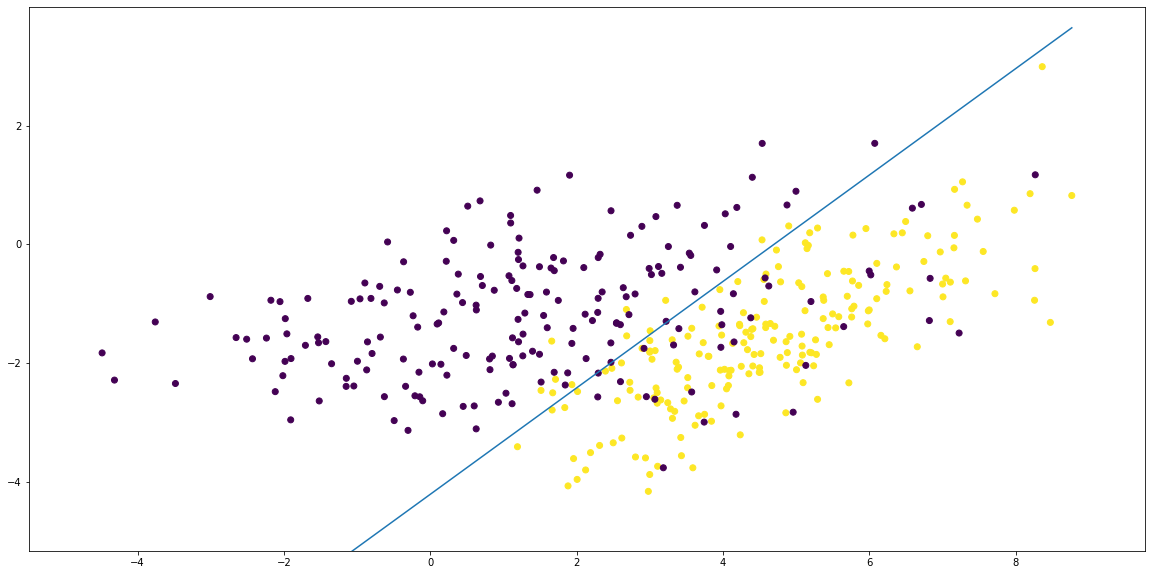

In [204]:
max_epoch = 200

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.scatter(X[:,0], X[:,1], c=y)
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

model = MySGDClassifier1(alpha=.01, max_epoch=200, C = 1/2, batch_size=5)
model.fit(X, y)

print("theta = ", model.weights)

t0 = model.weights.item(0)
t1 = model.weights.item(1)
t2 = model.weights.item(2)

x_ = np.array([x_min, x_max])
y_ = -(x_ * t1 + t0) / t2

ax.plot(x_, y_)
ax.set_xlim(x_min - 1, x_max + 1)
ax.set_ylim(y_min - 1, y_max + 1)
plt.show()